In [92]:

from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor

from sklearn.preprocessing import StandardScaler

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import tensorflow as tf

In [93]:
df = pd.read_csv('./archive/card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [94]:
# Dataframe features 
print(df.keys())

# Type Check. All attributes is belonged to a float type
df.dtypes

# Basic Information & Data Description
df.info()
df.describe()

# Check if any duplicated value exists. It turns out to be zero, and it means there's no duplicates.
df.duplicated().sum()
# Check if there's a null in the dataset. It also turns out to be zero, and it means there's no null on here.
df.isnull().sum()


Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

<AxesSubplot:>

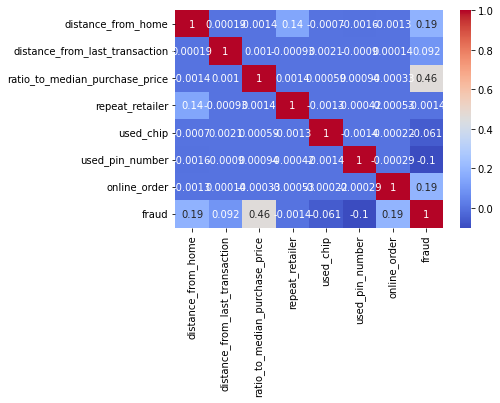

In [134]:
# Correlation Visualization 
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [96]:
# Differentiate X and y 
# X = df[df.columns.difference(['fraud'])]
# y = df["fraud"]
# print('X:', X.shape)

index_list = list(df.columns.difference(['fraud']).values)
X = df.loc[:, index_list].values
y = df.loc[:, ['fraud']].values

# Split data into normal & abnormal ones 
df_normal = df[df['fraud'] == 0]
df_abnormal =  df[df['fraud'] == 1]

X_normal = df_normal.loc[:, index_list].values
y_normal = df_normal.loc[:, ['fraud']].values

X_abnormal = df_abnormal.loc[:, index_list].values
y_abnormal = df_abnormal.loc[:, ['fraud']].values

print('X:', X.shape)
print('X_normal:', X_normal.shape)
print('X_abnormal:', X_abnormal.shape)

X: (1000000, 7)
X_normal: (912597, 7)
X_abnormal: (87403, 7)


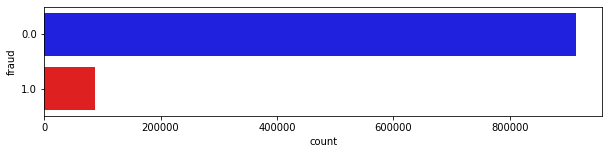

In [97]:
plt.figure(figsize=(10, 2))
fig = sns.countplot(y=df['fraud'],
                    data=df, palette=["blue", "red"])
plt.show()

<AxesSubplot:xlabel='PCA_1', ylabel='PCA_2'>

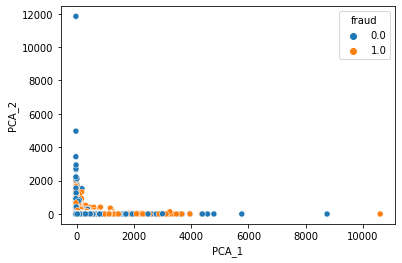

In [98]:
# PCA for Visualization 
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_df = pd.DataFrame(data = principal_components, columns = ['PCA_1', 'PCA_2'])
principal_df.head()
final_df = pd.concat([principal_df, df[['fraud']]], axis=1)

# Data Visualization 
plt.figure(figsize=(6, 4))
sns.scatterplot(final_df['PCA_1'], final_df['PCA_2'], hue=df['fraud'])

In [132]:
for column in df.columns: 
    print("[{column}'] \nMinimum: {min} \nMaximum: {max} \nAverage: {avg} \nMedian: {med}".format(
          column = column,
          min = df[column].min(),
          max = df[column].max(),
          avg = df[column].mean(),
          med = df[column].median()))

[distance_from_home'] 
Minimum: 0.0048743850667442 
Maximum: 10632.723672241103 
Average: 26.62879219257128 
Median: 9.967760078697681
[distance_from_last_transaction'] 
Minimum: 0.000118281615244 
Maximum: 11851.10456494614 
Average: 5.036519397861618 
Median: 0.9986501239499769
[ratio_to_median_purchase_price'] 
Minimum: 0.004399239615964 
Maximum: 267.8029421832708 
Average: 1.8241819784044924 
Median: 0.9977169368730889
[repeat_retailer'] 
Minimum: 0.0 
Maximum: 1.0 
Average: 0.881536 
Median: 1.0
[used_chip'] 
Minimum: 0.0 
Maximum: 1.0 
Average: 0.350399 
Median: 0.0
[used_pin_number'] 
Minimum: 0.0 
Maximum: 1.0 
Average: 0.100608 
Median: 0.0
[online_order'] 
Minimum: 0.0 
Maximum: 1.0 
Average: 0.650552 
Median: 1.0
[fraud'] 
Minimum: 0.0 
Maximum: 1.0 
Average: 0.087403 
Median: 0.0


<AxesSubplot:>

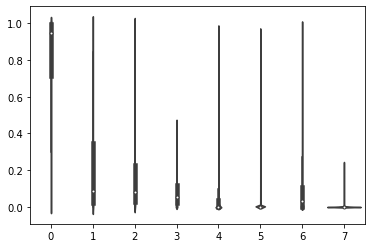

In [102]:
df_standarized = Normalizer().fit_transform(df)
sns.violinplot(data=df_standarized)

KeyboardInterrupt: 

In [ ]:
# Separate Train and Test Data in a ratio of 3 : 1
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], random_state=3)